In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import GRU,Dense,Dropout

reading and preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\climate change\jena_climate_2009_2016.csv")

In [3]:
df.shape

(420551, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [5]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [6]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [7]:
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")

In [8]:
df = df.set_index("Date Time").sort_index()

In [9]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [10]:
df.isna().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [11]:
df.replace(-9999, np.nan, inplace=True)

In [12]:
df.isna().sum()

p (mbar)            0
T (degC)            0
Tpot (K)            0
Tdew (degC)         0
rh (%)              0
VPmax (mbar)        0
VPact (mbar)        0
VPdef (mbar)        0
sh (g/kg)           0
H2OC (mmol/mol)     0
rho (g/m**3)        0
wv (m/s)           18
max. wv (m/s)      20
wd (deg)            0
dtype: int64

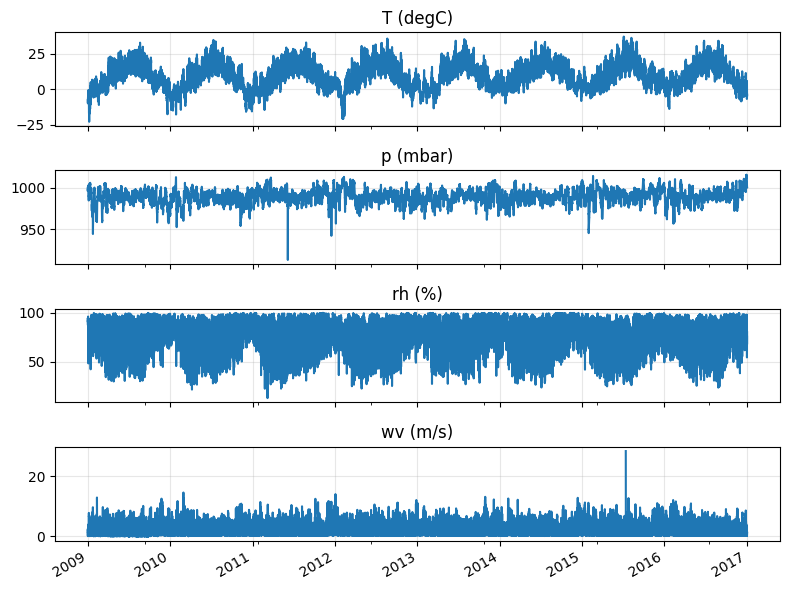

In [13]:
# time series line plot
cols_for_line = ["T (degC)", "p (mbar)", "rh (%)", "wv (m/s)"]
available = [c for c in cols_for_line if c in df.columns]

fig, axes = plt.subplots(len(available), 1, figsize=(8, 6), sharex=True)
if len(available) == 1:
    axes = [axes]

for ax, col in zip(axes, available):
    df[col].plot(ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


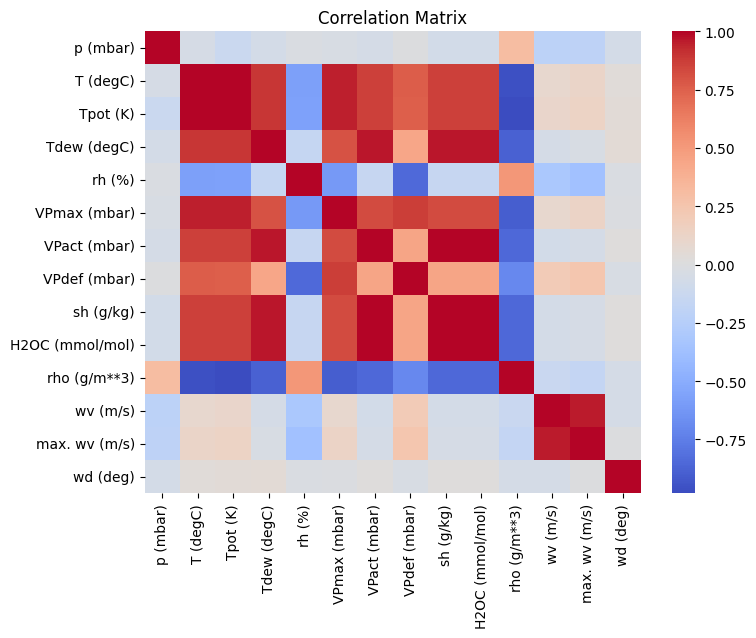

In [14]:
# 1)cooses numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# 2) correlation
corr = num_df.corr()

# 3) 
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False)  # annot=True اگر می‌خوای مقدار همبستگی نوشته بشه
plt.title("Correlation Matrix")
plt.show()

In [15]:


valid_ranges = {
    "p (mbar)": (870, 1080),
    "T (degC)": (-40, 50),
    "Tpot (K)": (230, 320),
    "Tdew (degC)": (-40, 30),
    "rh (%)": (0, 100),
    "VPmax (mbar)": (0, 100),
    "VPact (mbar)": (0, 50),
    "VPdef (mbar)": (0, 50),
    "sh (g/kg)": (0, 30),
    "H2OC (mmol/mol)": (0, 40),
    "rho (g/m**3)": (1000, 1400),
    "wv (m/s)": (0, 60),
    "max. wv (m/s)": (0, 100),
    "wd (deg)": (0, 360)
}

N = len(df)
report_rows = []

for col, (low, high) in valid_ranges.items():
    if col in df.columns:
        # 
        s = df[col]
        mask_invalid = s.notna() & ((s < low) | (s > high))
        invalid_count = int(mask_invalid.sum())
        invalid_pct = 100.0 * invalid_count / N

        report_rows.append({
            "column": col,
            "valid_low": low,
            "valid_high": high,
            "invalid_count": invalid_count,
            "invalid_pct": round(invalid_pct, 4)
        })


report_df = pd.DataFrame(report_rows).set_index("column").sort_index()
print(report_df)


                 valid_low  valid_high  invalid_count  invalid_pct
column                                                            
H2OC (mmol/mol)          0          40              0          0.0
T (degC)               -40          50              0          0.0
Tdew (degC)            -40          30              0          0.0
Tpot (K)               230         320              0          0.0
VPact (mbar)             0          50              0          0.0
VPdef (mbar)             0          50              0          0.0
VPmax (mbar)             0         100              0          0.0
max. wv (m/s)            0         100              0          0.0
p (mbar)               870        1080              0          0.0
rh (%)                   0         100              0          0.0
rho (g/m**3)          1000        1400              0          0.0
sh (g/kg)                0          30              0          0.0
wd (deg)                 0         360              0         

In [16]:
df.index = pd.to_datetime(df.index, format="%d.%m.%Y %H:%M:%S")
mask = (df.index.minute == 0) & (df.index.hour % 3 == 0)

In [17]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
cols = ["T (degC)", "p (mbar)", "rh (%)", "wv (m/s)"]
df_var = df[cols].copy().interpolate(limit_direction="both")

In [19]:
!pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks



In [ ]:
# GRU MODELLING
df_new = df.loc[mask, cols].copy()

df_new = df_new.dropna()


features_gru = df_new.copy()                 
target_gru   = df_new["T (degC)"].copy()     


n = len(df_new)
train_size = int(n * 0.7)
val_size   = int(n * 0.15)

train_X = features_gru.iloc[:train_size]
val_X   = features_gru.iloc[train_size:train_size+val_size]
test_X  = features_gru.iloc[train_size+val_size:]

train_y = target_gru.iloc[:train_size]
val_y   = target_gru.iloc[train_size:train_size+val_size]
test_y  = target_gru.iloc[train_size+val_size:]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X   = scaler.transform(val_X)
test_X  = scaler.transform(test_X)



def make_sequences(X_np, y_np, seq_len=56, horizon=8, step=1):
    X_seq, y_seq = [], []
    N = len(X_np)
    for i in range(0, N - seq_len - horizon, step):
        X_seq.append(X_np[i:i+seq_len])
        y_seq.append(y_np[i+seq_len + horizon])
    return np.array(X_seq), np.array(y_seq)

Xtr_seq, ytr_seq = make_sequences(train_X, train_y.values, seq_len=56, horizon=8, step=1)
Xva_seq, yva_seq = make_sequences(val_X,   val_y.values,   seq_len=56, horizon=8, step=1)
Xte_seq, yte_seq = make_sequences(test_X,  test_y.values,  seq_len=56, horizon=8, step=1)
print("GRU shapes →",
      "\nTrain:", Xtr_seq.shape, ytr_seq.shape,
      "\nVal:  ", Xva_seq.shape, yva_seq.shape,
      "\nTest: ", Xte_seq.shape, yte_seq.shape)


GRU shapes → 
Train: (16289, 56, 4) (16289,) 
Val:   (3440, 56, 4) (3440,) 
Test:  (3441, 56, 4) (3441,)


In [ ]:


seq_len=56


model=Sequential()

model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,input_shape=(56,4),return_sequences=True))
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="linear"))


opt  = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanAbsoluteError()
model.compile(optimizer=opt, loss=loss, metrics=["mse", "mae"])
model.summary()


model.fit(Xtr_seq,ytr_seq,validation_data=(Xva_seq,yva_seq),epochs=100,batch_size=128,verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 56, 128)           51456     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 167,169
Trainable params: 167,169
Non-trai

[Evaluate]  Loss(MAE): 2.9869 | MSE: 14.1630 | MAE: 2.9869
108/108 [==============================] - 2s 15ms/step
[Metrics]   MAE: 2.9869 | RMSE: 3.7634


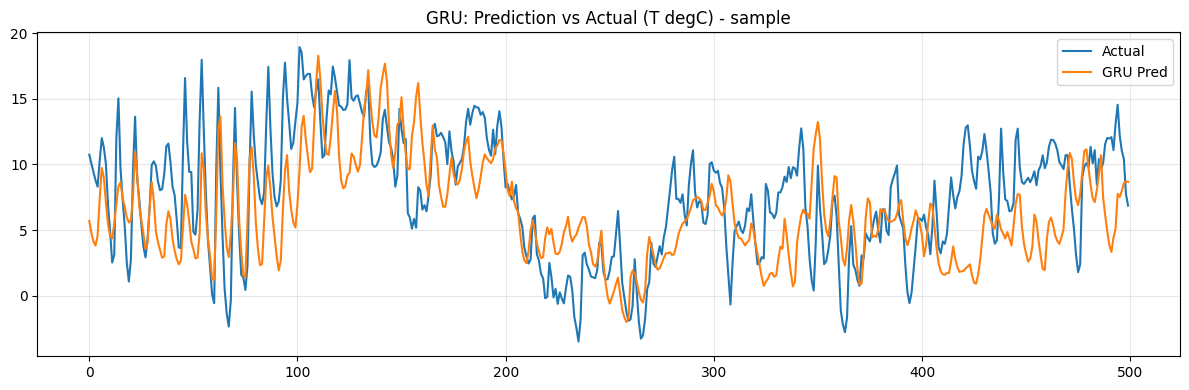

In [ ]:
#loss=MAE SE/MAE)
test_loss, test_mse, test_mae = model.evaluate(Xte_seq, yte_seq, verbose=0)
print(f"[Evaluate]  Loss(MAE): {test_loss:.4f} | MSE: {test_mse:.4f} | MAE: {test_mae:.4f}")


y_pred_gru = model.predict(Xte_seq).ravel()
mae_gru  = mean_absolute_error(yte_seq, y_pred_gru)
rmse_gru = np.sqrt(mean_squared_error(yte_seq, y_pred_gru))  
print(f"[Metrics]   MAE: {mae_gru:.4f} | RMSE: {rmse_gru:.4f}")


plt.figure(figsize=(12,4))
N_show = min(500, len(yte_seq))
plt.plot(yte_seq[:N_show], label="Actual")
plt.plot(y_pred_gru[:N_show], label="GRU Pred")
plt.title("GRU: Prediction vs Actual (T degC) - sample")
plt.grid(True, alpha=.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error


data = df_new[cols].dropna().copy()
n = len(data)

train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train = data.iloc[:train_end]
val   = data.iloc[train_end:val_end]
test  = data.iloc[val_end:]


maxlags = 24
sel = VAR(train).select_order(maxlags=maxlags)
best_lag = sel.selected_orders['aic']
print(f"Best lag by AIC = {best_lag}")


train_val = data.iloc[:val_end]
var_model = VAR(train_val)
var_res = var_model.fit(best_lag)
print(var_res.summary())


horizon = 8
k_ar = var_res.k_ar
target_col = "T (degC)"
tidx = cols.index(target_col)

history = train_val.values.tolist()
y_true, y_pred = [], []

for i in range(0, len(test) - (horizon - 1)):
    last_k = np.array(history[-k_ar:])
    fcst = var_res.forecast(y=last_k, steps=horizon)
    yhat = fcst[horizon - 1, tidx]
    yreal = test.iloc[i + (horizon - 1), tidx]

    y_pred.append(yhat)
    y_true.append(yreal)

    history.append(test.iloc[i].values.tolist())

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)  
rmse = np.sqrt(mse)                        

print(f"VAR 24h-ahead — MAE: {mae:.3f}, RMSE: {rmse:.3f}")


C:\Users\reyha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best lag by AIC = 24


C:\Users\reyha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Oct, 2025
Time:                     13:40:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.56607
Nobs:                     19833.0    HQIC:                   3.46217
Log likelihood:          -146011.    FPE:                    30.3143
AIC:                      3.41162    Det(Omega_mle):         29.7284
--------------------------------------------------------------------
Results for equation T (degC)
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -4.638306         1.758666           -2.637           0.008
L1.T (degC)          1.268394         0.010972          115.606           0.000
L1.p (mbar)         -0.062745         0.015314           -4.0

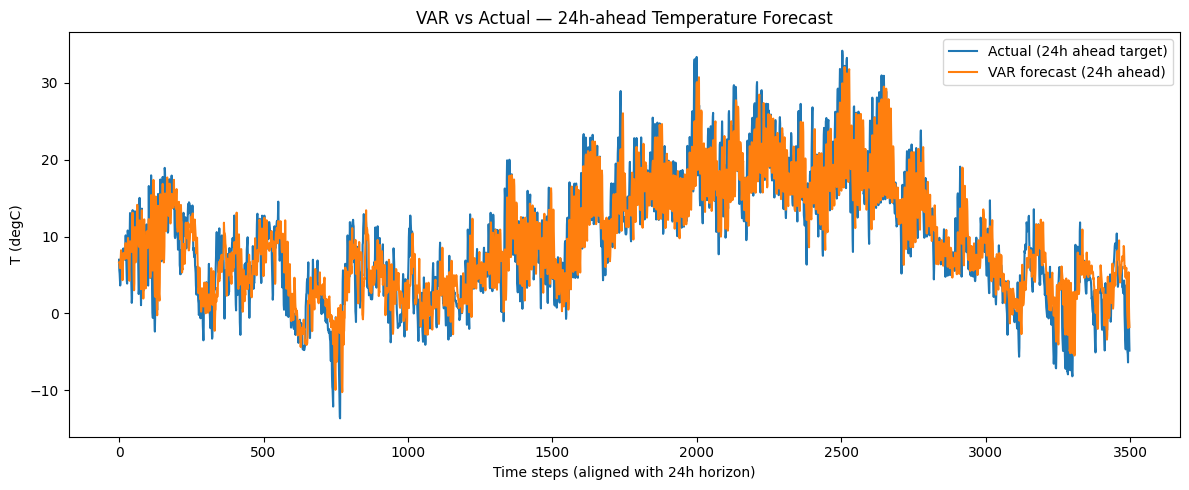

VAR 24h-ahead — MAE: 2.438, RMSE: 3.100


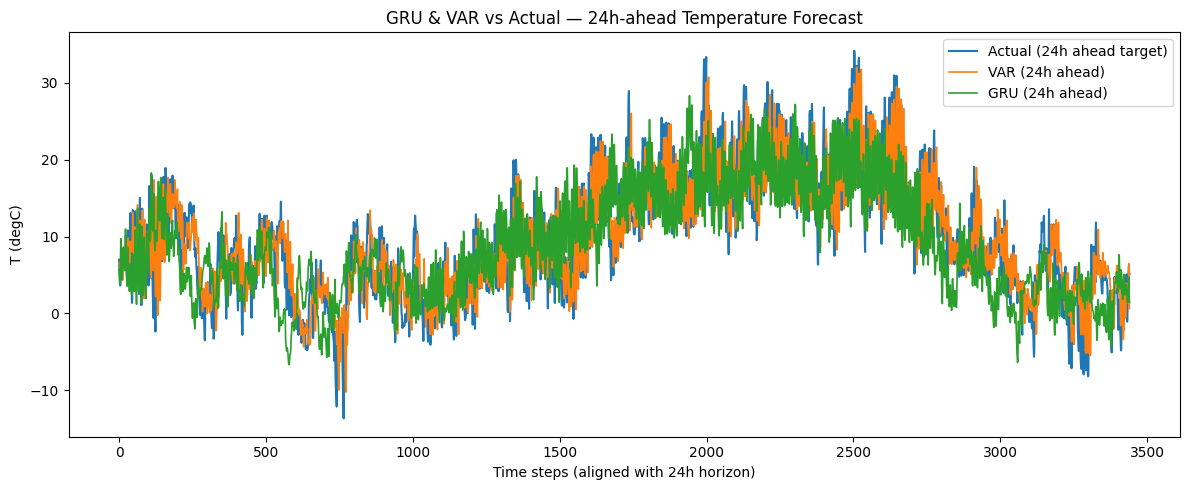

GRU 24h-ahead — MAE: 4.107, RMSE: 5.132


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


try:
    target_col
except NameError:
    target_col = "T (degC)"   


y_true_arr = np.asarray(y_true, dtype=float)
y_var_arr  = np.asarray(y_pred, dtype=float)


plt.figure(figsize=(12, 5))
plt.plot(y_true_arr, label='Actual (24h ahead target)', linewidth=1.5)
plt.plot(y_var_arr,  label='VAR forecast (24h ahead)', linewidth=1.5)
plt.title('VAR vs Actual — 24h-ahead Temperature Forecast')
plt.xlabel('Time steps (aligned with 24h horizon)')
plt.ylabel(target_col)
plt.legend()
plt.tight_layout()
plt.show()


var_mae  = mean_absolute_error(y_true_arr, y_var_arr)
var_rmse = np.sqrt(mean_squared_error(y_true_arr, y_var_arr))
print(f"VAR 24h-ahead — MAE: {var_mae:.3f}, RMSE: {var_rmse:.3f}")


if 'y_pred_gru_24h' in globals():
    y_gru_arr = np.asarray(y_pred_gru_24h, dtype=float)
    m = min(len(y_true_arr), len(y_var_arr), len(y_gru_arr))
    if m > 0:
        plt.figure(figsize=(12, 5))
        plt.plot(y_true_arr[:m], label='Actual (24h ahead target)', linewidth=1.5)
        plt.plot(y_var_arr[:m],  label='VAR (24h ahead)', linewidth=1.2)
        plt.plot(y_gru_arr[:m],  label='GRU (24h ahead)', linewidth=1.2)
        plt.title('GRU & VAR vs Actual — 24h-ahead Temperature Forecast')
        plt.xlabel('Time steps (aligned with 24h horizon)')
        plt.ylabel(target_col)
        plt.legend()
        plt.tight_layout()
        plt.show()

        gru_mae  = mean_absolute_error(y_true_arr[:m], y_gru_arr[:m])
        gru_rmse = np.sqrt(mean_squared_error(y_true_arr[:m], y_gru_arr[:m]))
        print(f"GRU 24h-ahead — MAE: {gru_mae:.3f}, RMSE: {gru_rmse:.3f}")
else:
    print("Note: y_pred_gru_24h not found; skipping GRU plot/metrics.")


In [ ]:

print(len(y_true), len(y_pred))


import numpy as np
print("NaN in y_true:", np.isnan(np.asarray(y_true, float)).sum())
print("NaN in y_pred:", np.isnan(np.asarray(y_pred, float)).sum())

times_var = test.index[horizon-1 : horizon-1 + len(y_true)]


actual_series = test[target_col].iloc[horizon-1 : horizon-1 + len(y_true)].to_numpy()
print("allclose(y_true, actual_series):", np.allclose(np.asarray(y_true, float), actual_series))


3498 3498
NaN in y_true: 0
NaN in y_pred: 0
allclose(y_true, actual_series): True
